In [1]:
import numpy as np
import scipy
import tensorflow as tf

print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("TensorFlow version:", tf.__version__)

NumPy version: 1.26.4
SciPy version: 1.11.4
TensorFlow version: 2.19.0


In [2]:
from tensorflow import keras
from keras.datasets import mnist # is the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

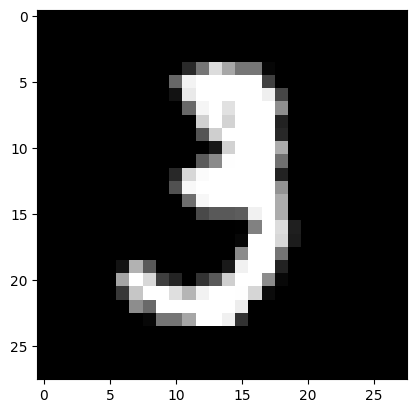

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap='gray')
plt.show() # max an min is 0, 255

Preprocessing (need to divide by 255)

In [6]:
# size aval -1 mizarim ke automatic hesab konm 28 satr 28 sotin va 1 channel dare. tagsim bar 255 ta sample normalized
x_train = x_train.reshape((-1, 28, 28,1)).astype('float32')/255
x_test = x_test.reshape((-1, 28, 28,1)).astype('float32')/255

In [8]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))

f:\Climate corporation-Bayer-Ettain Group - Copy\practice_python\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,785,856 (10.63 MB)

 Trainable params: 2,785,856 (10.63 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist = model.fit(x_train, y_train, epochs=2, batch_size=256,validation_data=(x_test, y_test))

Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 206ms/step - accuracy: 0.1008 - loss: 4.8395 - val_accuracy: 0.0980 - val_loss: 4.8418
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 254ms/step - accuracy: 0.0986 - loss: 4.8331 - val_accuracy: 0.0980 - val_loss: 4.8341


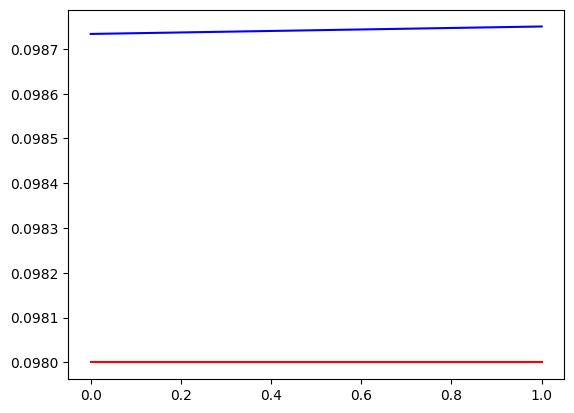

In [20]:
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')